# # Project: Investigate a Dataset - [Titanic dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

## The Dataset chosen for analysis: Titanic dataset 

>This data set contains information about the passengers on the titanic. 


## Question(s) for Analysis:
### Relation between Survival and :
> Fare

> Class

> Age

> Sex

> Number of Siblings

> Number of children and parents

> Port of Embarkation



In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [72]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Cleaning
#### The Data Structure:
>Before cleaning the data, we have investigated the structure of our dataset and if there is any null values, missing values,  inconsistency or inadequate datatype, There were also unecessary columns with missing data, inadequate datatypes

###  The Cleaning Process:
>I removed columns that are not necessary for my analysis 'PassengerId', 'Name', 'Ticket', 'Cabin' to improve database redability.

>I dropped the null values.

>I removed the duplicated rows.

In [75]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [76]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis =1, inplace=True)

In [77]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [78]:
df.rename(columns=lambda x: x.strip().lower().replace(' ','_'), inplace=True)

In [79]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


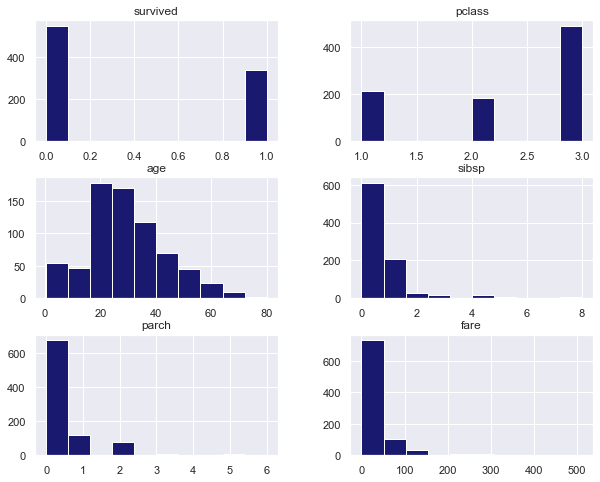

In [82]:
df.hist(figsize=(10,8),
        color = 'midnightblue');

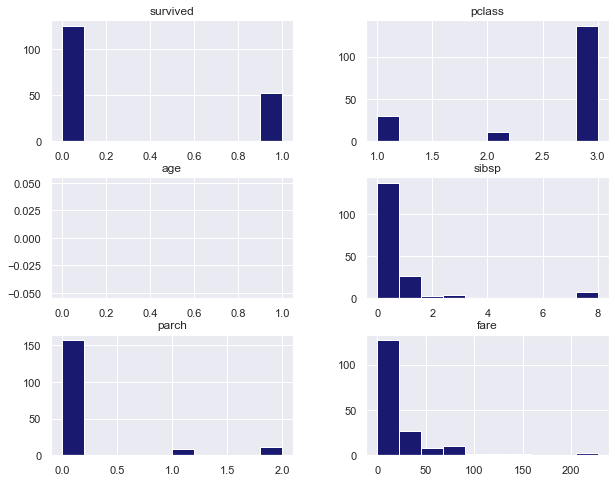

In [83]:
df[df['age'].isnull()].hist(figsize=(10,8),
                            color = 'midnightblue');

In [14]:
df.fillna(df.mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [15]:
df.dropna(inplace = True)

# Fare and survival

In [84]:
#calculating the median
fare_median = df['fare'].median()

In [85]:
fare_median

14.4542

In [86]:
#creating two dataframes:
low_fare = df.query('fare < 14.4542')
high_fare = df.query('fare >= 14.4542')

In [20]:
survived_low_fare = low_fare['survived'].mean()
survived_high_fare = high_fare['survived'].mean()

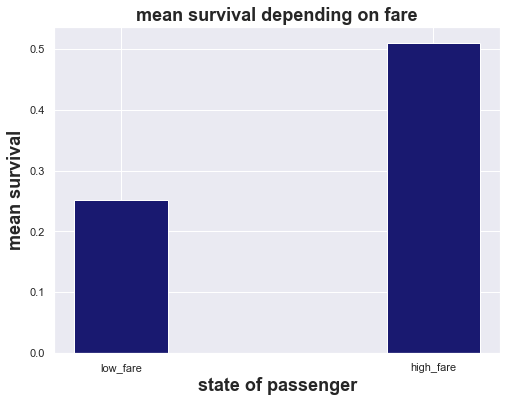

In [89]:
plt.figure(figsize=(8,6))
plt.bar(['low_fare', 'high_fare'], [survived_low_fare, survived_high_fare ], width = 0.3, color = 'midnightblue')
plt.title('mean survival depending on fare', fontsize = 18, weight = 'bold')
plt.xlabel('state of passenger', fontsize = 18, weight = 'bold')
plt.ylabel('mean survival', fontsize = 18, weight = 'bold')
plt.show();

## Creating two dataframes for the survivors and the dead

In [90]:
survived_df = df.query('survived == True')

In [91]:
survived_df.survived.unique()

array([1], dtype=int64)

In [92]:
died = df.query('survived == False')

In [93]:
died.survived.unique()

array([0], dtype=int64)

### Calculating the mean fare for both the survived and dead datasets:

In [94]:
mean_fare_survived = survived_df['fare'].mean()

In [95]:
mean_fare_survived

48.39540760233917

In [96]:
mean_fare_died = died['fare'].mean()

In [97]:
mean_fare_died

22.117886885245877

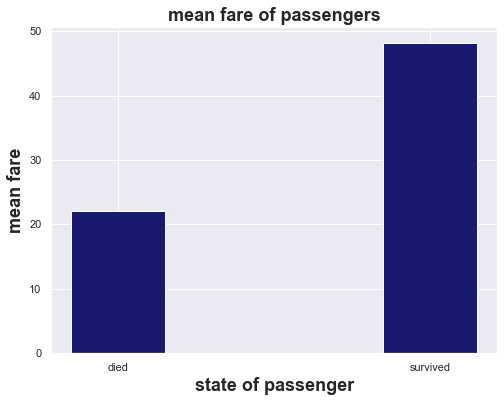

In [30]:
plt.figure(figsize=(8,6))
plt.bar(['died', 'survived'], [mean_fare_died, mean_fare_survived ], width = 0.3, color = 'midnightblue')
plt.title('mean fare of passengers', fontsize = 18, weight = 'bold')
plt.xlabel('state of passenger', fontsize = 18, weight = 'bold')
plt.ylabel('mean fare', fontsize = 18, weight = 'bold')
plt.show();

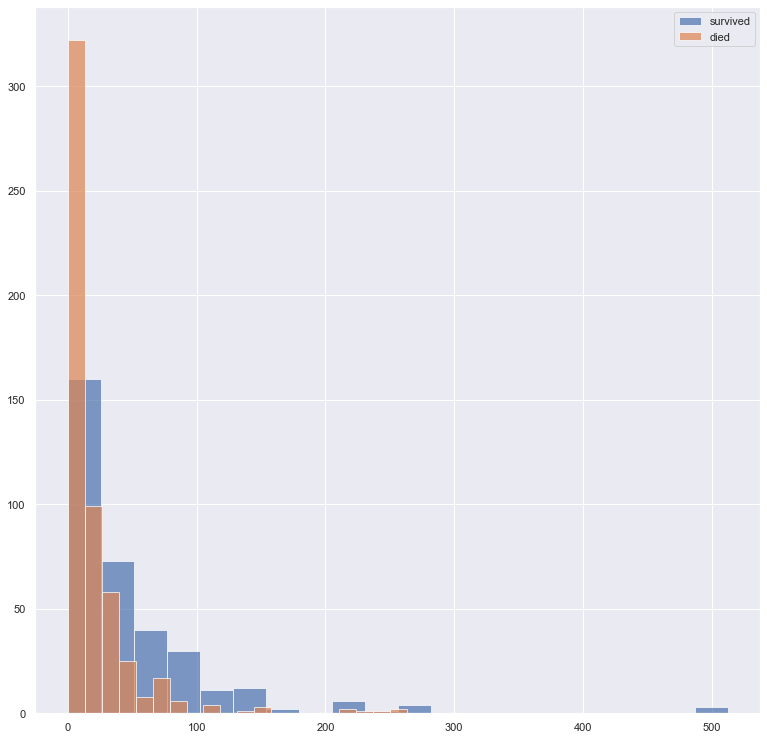

In [98]:
plt.figure(figsize=(13,13))
survived_df['fare'].hist(alpha = 0.7, bins =20, label = 'survived')
died['fare'].hist(alpha = 0.7, bins =20, label = 'died')
plt.legend()
plt.show();

> From the relation between survival and fare, we conclude that there is a huge relation between fare and survival, the higher the fare the higher the probability of survival.

# Class and survival

In [99]:
class_survival = df.groupby('pclass')['survived'].mean()
class_survival

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

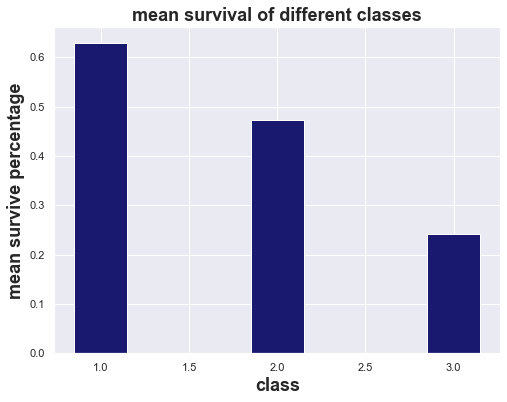

In [101]:
plt.figure(figsize=(8,6))
plt.bar(class_survival.index, class_survival, width = 0.3, color = 'midnightblue')
plt.title('mean survival of different classes', fontsize = 18, weight = 'bold')
plt.xlabel('class', fontsize = 18, weight = 'bold')
plt.ylabel('mean survive percentage', fontsize = 18, weight = 'bold')
plt.show();

### another way of vizualising the data 

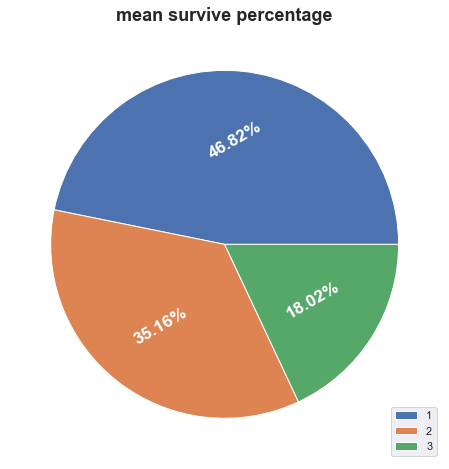

In [102]:
plt.figure(figsize=(10,8))
plt.pie(class_survival, labels=class_survival.index, autopct= '%.2f%%',
        textprops= {'size':'x-large',
                    'fontweight': 'bold',
                    'rotation': "30",
                    'color':'w'})
plt.title('mean survive percentage', fontsize = 18, fontweight = 'bold')     
plt.legend()
plt.show()

> From the relation between survival and class, we conclude that there is a huge relation between class and survival, the higher the class the higher the probability of survival, which really makes sense as we have just proved a relation between high fare and survival.

# Age and survival

In [35]:
df.age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
30.000000     25
            ... 
53.000000      1
55.500000      1
0.920000       1
24.500000      1
70.500000      1
Name: age, Length: 89, dtype: int64

In [36]:
#calculating the mean age of both the survivors and the dead
mean_age_survived = survived_df['age'].mean()
mean_age_died = died['age'].mean()

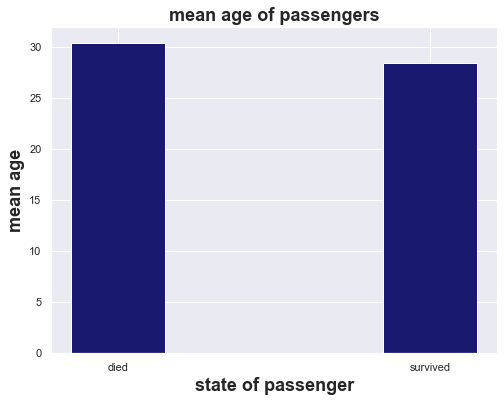

In [103]:
plt.figure(figsize=(8,6))
plt.bar(['died', 'survived'], [mean_age_died, mean_age_survived ], width = 0.3, color = 'midnightblue')
plt.title('mean age of passengers', fontsize = 18, weight = 'bold')
plt.xlabel('state of passenger', fontsize = 18, weight = 'bold')
plt.ylabel('mean age', fontsize = 18, weight = 'bold')
plt.show();

>We conclude that there is no significant difference between the mean age of both state, but it seems that younger people have a slightly higher chance of survival.

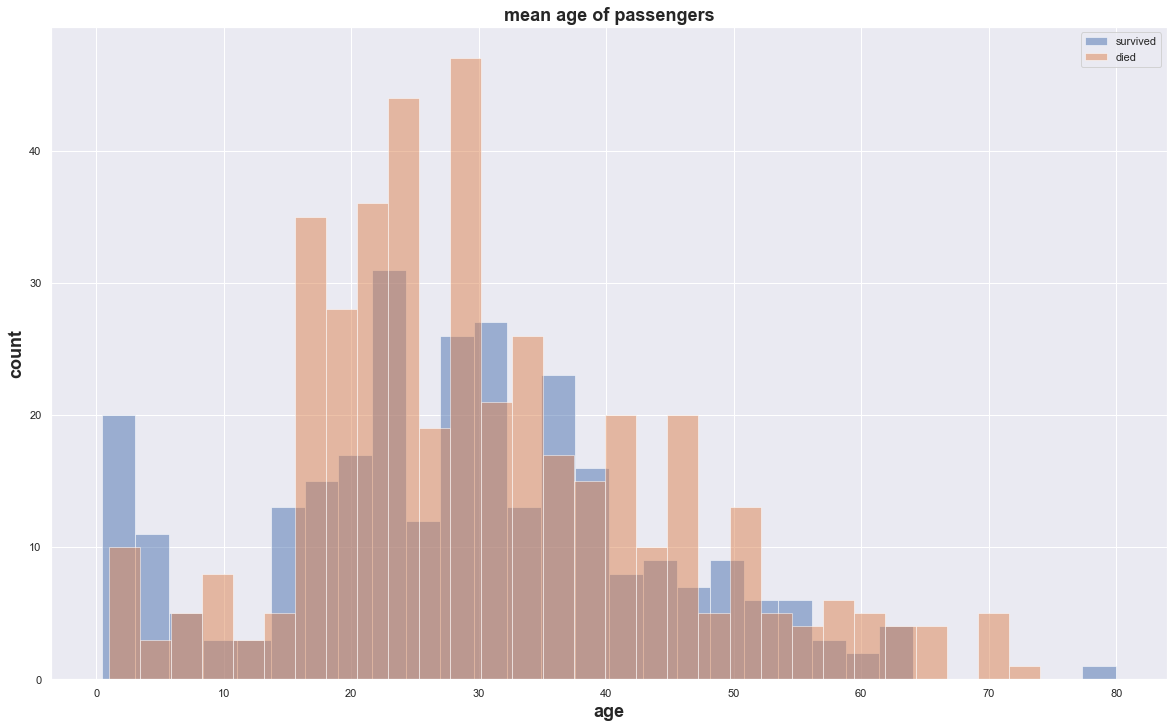

In [105]:
plt.figure(figsize=(20,12))
survived_df['age'].hist(alpha = 0.5, bins =30, label = 'survived')
died['age'].hist(alpha = 0.5, bins =30, label = 'died')
plt.title('mean age of passengers', fontsize = 18, weight = 'bold')
plt.xlabel('age', fontsize = 18, weight = 'bold')
plt.ylabel('count', fontsize = 18, weight = 'bold')
plt.legend()
plt.show();

> from the histogram we can conclude that infants had a higher chance of survivng than old people.

# Gender and Survival

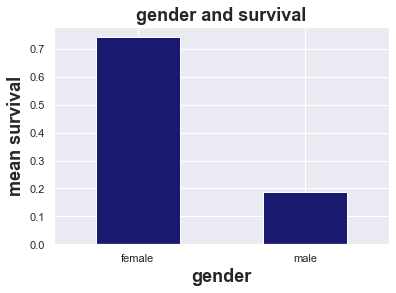

In [112]:
df.groupby('sex')['survived'].mean().plot(kind = 'bar',
                                          color = 'midnightblue')
plt.title('gender and survival', fontsize = 18, weight = 'bold')
plt.xlabel('gender', fontsize = 18, weight = 'bold')
plt.ylabel('mean survival', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 360)
plt.show();

>Obviously females had a higher a chance of survival than men

### We  already knew that females had a higher a chance of survival than men, but were they more than men?

In [113]:
df.groupby('sex')['pclass'].value_counts()

sex     pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: pclass, dtype: int64

>It seems not, males are definitley more than females by a gap.

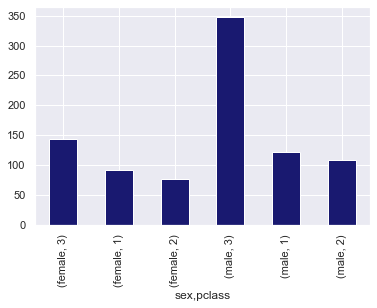

In [50]:
df.groupby('sex')['pclass'].value_counts().plot(kind = 'bar',
                                                color = 'midnightblue');

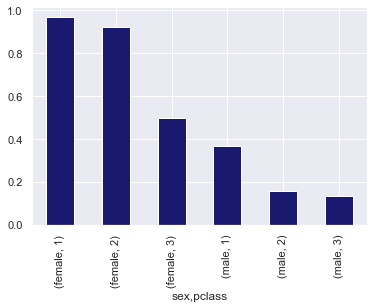

In [52]:
df.groupby(['sex', 'pclass'])['survived'].mean().plot(kind = 'bar',
                                                color = 'midnightblue');

>Being a female from the first and second class means you have the highest chance of surviving.

# sibsp and survival

## sibsp is the number of siblings / spouses aboard the Titanic

In [115]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.25,S


In [116]:
#calculating the mean sibsp for both the survivors and the dead 
mean_sibsp_survived = survived_df['sibsp'].mean()
mean_sibsp_died = died['sibsp'].mean()

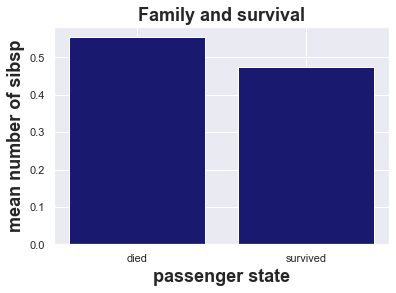

In [117]:
plt.bar(['died', 'survived'],
        [mean_sibsp_died, mean_sibsp_survived],
         color = 'midnightblue')
plt.title('Family and survival', fontsize = 18, weight = 'bold')
plt.xlabel('passenger state', fontsize = 18, weight = 'bold')
plt.ylabel('mean number of sibsp', fontsize = 18, weight = 'bold')
plt.show();

> It seems that passengers who had a lower number of siblings had a higher chance of surviving.

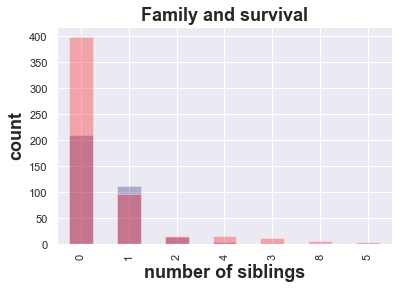

In [121]:
mean_sibsp_survived = survived_df['sibsp'].value_counts().plot(kind = 'bar',
                                                               alpha = 0.3,
                                                               label = 'survived',
                                                               color = 'midnightblue')
mean_sibsp_died = died['sibsp'].value_counts().plot(kind = 'bar',
                                                    alpha = 0.3,
                                                    label = 'died',
                                                    color = 'red')
plt.title('Family and survival', fontsize = 18, weight = 'bold')
plt.xlabel('number of siblings', fontsize = 18, weight = 'bold')
plt.ylabel('count', fontsize = 18, weight = 'bold')
plt.show();

> only passengers with one sibling had a higher chance of surviving compared to any other number of siblings. 

# parch and survival

### parch is the number of parents / children aboard the Titanic

In [123]:
#calculating the mean parch for both the survivors and the dead
mean_parch_survived = survived_df['parch'].mean()
mean_parch_died = died['parch'].mean()

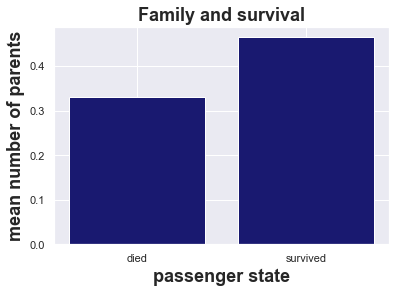

In [124]:
plt.bar(['died', 'survived'],
         [mean_parch_died, mean_parch_survived],
         color = 'midnightblue')
plt.title('Family and survival', fontsize = 18, weight = 'bold')
plt.xlabel('passenger state', fontsize = 18, weight = 'bold')
plt.ylabel('mean number of parents', fontsize = 18, weight = 'bold')
plt.show();

> having a parent or a kid correlate with a slightly higher chance of survival.

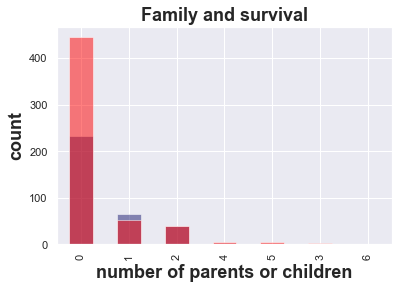

In [125]:
mean_parch_survived = survived_df['parch'].value_counts().plot(kind = 'bar',
                                                               alpha = 0.5,
                                                               label = 'survived',
                                                               color = 'midnightblue')
mean_parch_died = died['parch'].value_counts().plot(kind = 'bar',
                                                    alpha = 0.5,
                                                    label = 'died',
                                                    color = 'red')

plt.title('Family and survival', fontsize = 18, weight = 'bold')
plt.xlabel('number of parents or children', fontsize = 18, weight = 'bold')
plt.ylabel('count', fontsize = 18, weight = 'bold')
plt.show()

# Embarked and survival
### Port of Embarkation:	C = Cherbourg, Q = Queenstown, S = Southampton

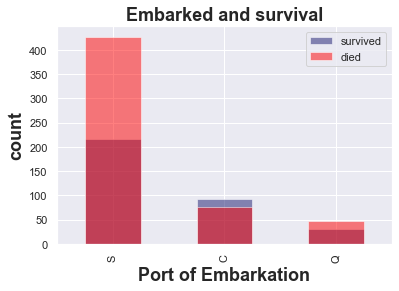

In [126]:
mean_embarked_survived = survived_df['embarked'].value_counts().plot(kind = 'bar',
                                                               alpha = 0.5,
                                                               label = 'survived',
                                                               color = 'midnightblue')
mean_embarked_died = died['embarked'].value_counts().plot(kind = 'bar',
                                                    alpha = 0.5,
                                                    label = 'died',
                                                    color = 'red')
plt.title('Embarked and survival', fontsize = 18, weight = 'bold')
plt.xlabel('Port of Embarkation', fontsize = 18, weight = 'bold')
plt.ylabel('count', fontsize = 18, weight = 'bold')
plt.legend()
plt.show()

>If your Port of Embarkation is Cherbourg you'd have a slight higher chance of survival. 

# Conclusions:

>From the relation between survival and fare, we concluded that there is a significant relation between fare and survival, the higher the fare the higher the probability of survival.

>From the relation between survival and class, we concluded that there is a significant relation between class and survival, the higher the class the higher the probability of survival, which really makes sense as we have just proved a relation between high fare and survival.

>We concluded that there is no significant difference between the mean age of both survivors and dead, but it seems that younger people have a slightly higher chance of survival and that infants had a higher chance of survivng than old people.

>Females had a higher a chance of survival than men.

>Being a female from the first and second class means you have the highest chance of surviving.

>It seems that passengers who had a lower number of siblings had a higher chance of surviving.

>Only passengers with one sibling had a higher chance of surviving compared to any other number of siblings.

>Having a parent or a kid correlate with a slightly higher chance of survival.

>If your Port of Embarkation is Cherbourg you'd have a slight higher chance of survival. 